
# Classification with the German Traffic Sign Recognition Benchmark

<img src="img/sv_pp_TrafficSignRecognition.jpg" align="right" width=200>
An automatic road sign recognition system first locates road signs within images captured by an imaging sensor on-board of a vehicle, and then identifies road signs assisting the driver to properly operate the vehicle.

Automated road sign recognition is a difficult task. There are a number of important issues that need to be taken into consideration. These include: illumination conditions, direction of sign's face, status of paint on signs, placement of multiple signs near each other, torn and tilted signs, variations in sign's scale, obstacles such as tree, image sensor's properties, car vibrations, etc. 

Assuming that the road sign has been previously located in the image, neural networks may be employed to implement the classification module because they have proven to be good classifiers and have been able to successfully solve several object recognition problems. 

In this notebook you will work on a classification task of several road signs with neural networks. The images will be obtained from [a large, lifelike database of traffic sign images: the German Traffic Sign Recognition Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=news).

## Load data and preprocessing

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge, with the following properties:

* Single-image, multi-class classification problem
* More than 40 classes
* More than 50,000 images in total
* Large, lifelike database

The training set archive is structured as follows:

* One directory per class
* Each directory contains one CSV file with annotations ("GT-<ClassID>.csv") and the training images
* Training images are grouped by tracks
* Each track contains 30 images of one single physical traffic sign

The following pictures show examples of four different signs, along with their label or class number:

<table>
<tr>
<td><img src="img/00004_00022.png"></td>
<td><img src="img/00012_00026.png"></td>
<td><img src="img/00010_00016.png"></td>
<td><img src="img/00003_00009.png"></td>
</tr>
<tr>
<td>00003</td>
<td>00007</td>
<td>00013</td>
<td>00014</td>
</tr>
</table>

**The dataset can be downloaded from [here](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip). Please save and decompress the archive in the notebooks folder.**

The image directories will be decompressed in a folder named <tt>GTRSB/Final_Training/Images</tt>. 

The images are PPM images (RGB color). Files are numbered in two parts:

    XXXXX_YYYYY.ppm

The first part, `XXXXX`, represents the track number. The second part, `YYYYY`, is a running number within the track.

The annotations are stored in CSV format (field separator is ";" (semicolon) ). The annotations contain meta information about the image and the class:

* Filename - Image file the following information applies to
* Width, Height - Dimensions of the image
* Roi.x1,Roi.y1, Roi.x2,Roi.y2 - Location of the sign within the image (Images contain a border around the actual sign of 10 percent of the sign size, at least 5 pixel)
* ClassId - The class of the traffic sign

The helper function <tt>readTrafficSigns</tt> must be used for reading the images, with the following arguments:
* path to the image directories
* list of the classes to be read
* dictionary with pairs (class, tuple of tracks)

The results of the function are:
* list of images
* list of dimensions
* list of ROIs
* list of labels
* list of filenames

The following code uses the function for reading two tracks of each of four classes:

In [1]:
from packages.gtrsb import readTrafficSigns

classes = [3, 7, 13, 14]
tracks = {3: (5, 10), 7: (40, 8), 13: (24, 6), 14: (8, 15)}
trainImages, trainDims, trainROIs, \
trainLabels, filenames = readTrafficSigns('./GTSRB/Final_Training/Images', classes, tracks)

The number of read images should be: 4 classes &times; 2 tracks/class &times; 30 images/track = 240 images 

In [2]:
len(trainImages)

240

### Image processing

Please notice the following information about images:

* The images contain one traffic sign each
* Images contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches
* Image sizes vary between 15x15 to 250x250 pixels
* Images are not necessarily squared
* The actual traffic sign is not necessarily centered within the image.This is true for images that were close to the image border in the full camera image

<img src="img/GT-Example.png" align="right" width=100>
The ROI is defined as:
* `ROI.x1`: X-coordinate of top-left corner of traffic sign bounding box
* `ROI.y1`: Y-coordinate of top-left corner of traffic sign bounding box
* `ROI.x2`: X-coordinate of bottom-right corner of traffic sign bounding box
* `ROI.y2`: Y-coordinate of bottom-right corner of traffic sign bounding box

Let's plot a sample image, e.g. the one with index 100 in the dataset.

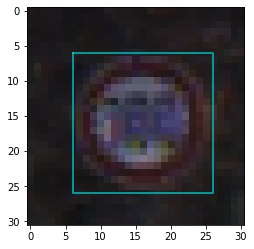

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from packages.gtrsb import processImage, plotTrafficSign

i = 100
roi = trainROIs[i]
p1, p2 = roi
x1, y1 = p1
x2, y2 = p2
plt.imshow(trainImages[i])
plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],'c');

The pixels of the image will be the inputs of the neural network. But the number of inputs is constant, thus all the images in the dataset must be scaled to the same resolution.

Moreover, the number of inputs has a significant input on the cost of training. A compromise is needed, by keeping the resolution low while still making possible the distinction of road signs.

In the processing function, the default image size is set to 20x20 pixels:

```def processImage(img, roi, dx=20, dy=20):
```

In addition, the original images are stored in RGB format, that is, each images has three pixel planes (one for each component). In the image processing, only the red channel is used (i.e. a single plane), since it seems to contain the most interesting information about the road sign.

In summary, the image processing steps are:

* Crop the image, i.e. select only the part of the image inside the ROI
* Scale the image to a fixed, small resultion
* Select the red channel
* Adjust the contrast with histogram equalization
* Finally, normalize the pixel values to the interval [-1,+1]

The result of the image processing for the traffic sign above would be:

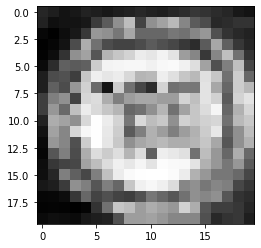

In [5]:
pr_img = processImage(trainImages[i],trainROIs[i])
plt.imshow(pr_img, cmap='gray');

The code below plots each step of the image processing.

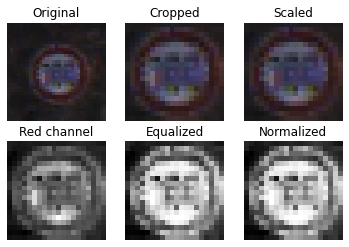

In [6]:
img = trainImages[i]
roi = trainROIs[i]
plotTrafficSign(img, roi)

# Workshop

Your task begins here. You must create a notebook with all the necessary statements for solving the traffic sign classification problem.

## Build the dataset

You should build a dataset of at least 4 classes with at least 5 tracks on each class. In the notebook, you should read the files, process the images (with the helper functions) and build the data structures.

For the maximum grade, your dataset should consist of at least 10 classes with at least 15 tracks on each class.

## Build the model and train

You should build a multilayer perceptron for learning this classification task. As a starting point, you could try a network similar to the digits problem.

You should save the resulting network in a <tt>pkl</tt> file for uploading.

You should also include some cells for loading the network and analysing the results without need of training.

### Analysis of the network

Finally, include the functions for the analysis of the result.

#### Classification report

#### Confusion matrix

#### Loss curve

## Workshop
**REMEMBER**: for the **workshop of sessions 2-3** you will submit the <tt>pkl</tt> file for the neural network that solves the traffic sign problem, and the <tt>ipynb</tt> file. 